In [1]:
import os
import numpy as np
import Cell_BLAST as cb
import utils
cb.config.RANDOM_SEED = 0
cb.config.N_JOBS = 4
fixed_model_kwargs = dict(
    latent_dim=10, cat_dim=20,
    epoch=500, patience=20
)

---

# Mouse

### Campbell

/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


batch cell_ontology_class cell_ontology_id cell_type1  \
arc1_AAAAAATGCATG    b1            tanycyte       CL:0002085  Tanycyte2   
arc1_AAAAACACGACG    b1              neuron       CL:0000540   Neurons3   
arc1_AAAAAGAAAAAT    b1            tanycyte       CL:0002085  Tanycyte2   
arc1_AAAAATGCACTA    b1              neuron       CL:0000540   Neurons6   
arc1_AAAACACTTCAT    b1              neuron       CL:0000540   Neurons6   

                  cell_type2 dataset_name  diet gender  organ      organism  \
arc1_AAAAAATGCATG       miss     Campbell  arc1      M  Brain  Mus musculus   
arc1_AAAAACACGACG        n20     Campbell  arc1      M  Brain  Mus musculus   
arc1_AAAAAGAAAAAT       miss     Campbell  arc1      M  Brain  Mus musculus   
arc1_AAAAATGCACTA        n13     Campbell  arc1      M  Brain  Mus musculus   
arc1_AAAACACTTCAT        n31     Campbell  arc1      M  Brain  Mus musculus   

                   platform                            region  
arc1_AAAAAATGCATG  Drop-seq  Hypothalamus and median eminence  
arc1_AAAAACACGACG  Drop-seq  Hypothalamus and median eminence  
arc1_AAAAAGAAAAAT  Drop-seq  Hypothalamus and median eminence  
arc1_AAAAATGCACTA  Drop-seq  Hypothalamus and median eminence  
arc1_AAAACACTTCAT  Drop-seq  Hypothalamus and median eminence

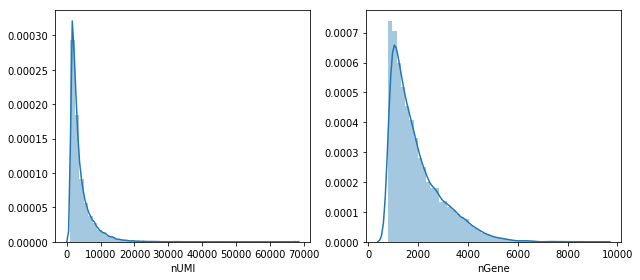

In [2]:
campbell = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Campbell/data.h5")
utils.peek(campbell, "Campbell")
campbell = campbell.normalize()
campbell.obs.head()

In [3]:
campbell_model = cb.directi.fit_DIRECTi(
    campbell, campbell.uns["seurat_genes"],
    **fixed_model_kwargs,
    path="/tmp/cb/db/Campbell/model_0"
)
campbell.latent = campbell_model.inference(campbell)

[DIRECTi epoch 0] train=2.027, val=1.838, time elapsed=2.5s Best save...
[DIRECTi epoch 1] train=0.827, val=0.785, time elapsed=1.6s Best save...
[DIRECTi epoch 2] train=0.693, val=0.714, time elapsed=1.6s Best save...
[DIRECTi epoch 3] train=0.676, val=0.690, time elapsed=1.6s Best save...
[DIRECTi epoch 4] train=0.671, val=0.684, time elapsed=1.6s Best save...
[DIRECTi epoch 5] train=0.667, val=0.684, time elapsed=1.5s Best save...
[DIRECTi epoch 6] train=0.660, val=0.670, time elapsed=1.6s Best save...
[DIRECTi epoch 7] train=0.653, val=0.660, time elapsed=1.6s Best save...
[DIRECTi epoch 8] train=0.645, val=0.652, time elapsed=1.6s Best save...
[DIRECTi epoch 9] train=0.639, val=0.652, time elapsed=1.6s Best save...
[DIRECTi epoch 10] train=0.634, val=0.643, time elapsed=1.6s Best save...
[DIRECTi epoch 11] train=0.630, val=0.638, time elapsed=1.6s Best save...
[DIRECTi epoch 12] train=0.627, val=0.633, time elapsed=1.6s Best save...
[DIRECTi epoch 13] train=0.623, val=0.631, time 

[  Info   ] Computing tSNE...


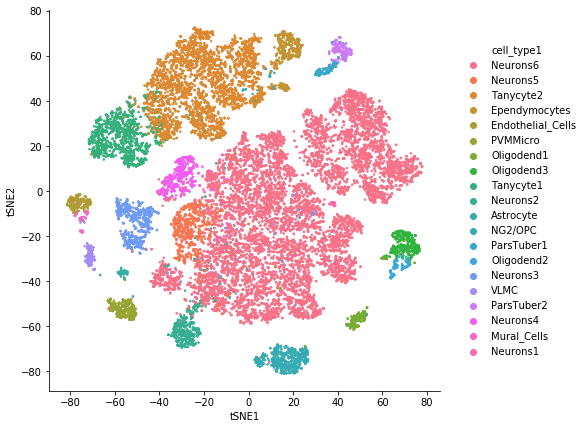

In [4]:
plot = campbell.visualize_latent("cell_type1")
plot.get_figure().savefig("Campbell/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


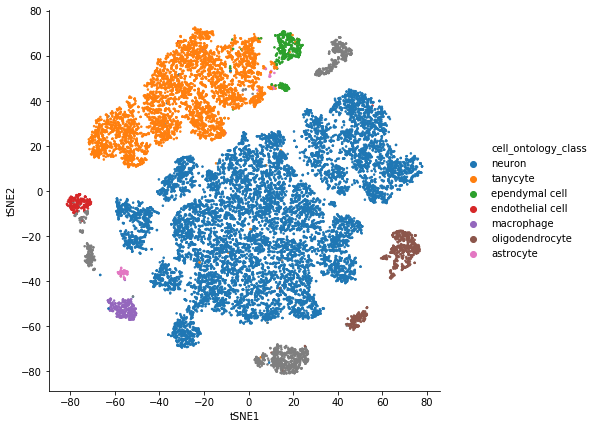

In [5]:
plot = campbell.visualize_latent("cell_ontology_class")
plot.get_figure().savefig("Campbell/cell_ontology_class.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


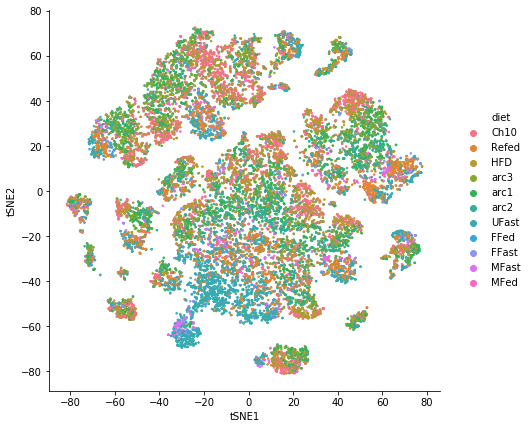

In [6]:
plot = campbell.visualize_latent("diet")
plot.get_figure().savefig("Campbell/diet.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


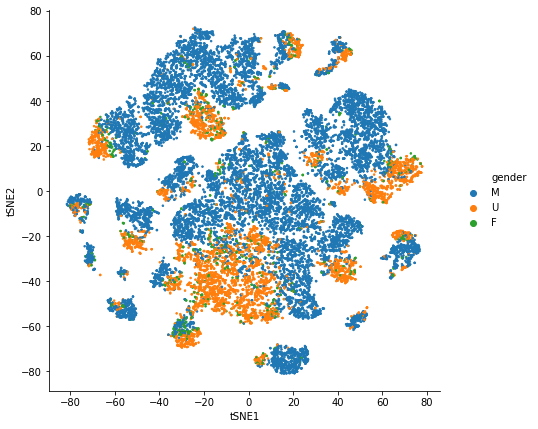

In [7]:
plot = campbell.visualize_latent("gender")
plot.get_figure().savefig("Campbell/gender.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


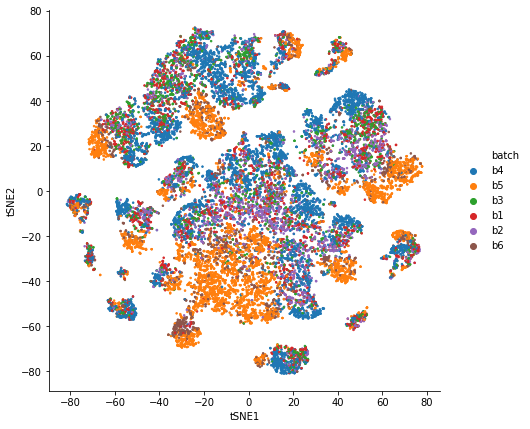

In [8]:
plot = campbell.visualize_latent("batch")
plot.get_figure().savefig("Campbell/batch.pdf", bbox_inches="tight")

In [9]:
%%capture capio
campbell_models = [campbell_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    campbell_models.append(cb.directi.fit_DIRECTi(
        campbell, campbell.uns["seurat_genes"],
        **fixed_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Campbell/model_%d" % i
    ))
campbell_blast = cb.blast.BLAST(campbell_models, campbell, keep_exprs=True).build_empirical()
campbell_blast.save("Campbell")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Campbell/model_1/checkpoint-186
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Campbell/model_2/checkpoint-146
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Campbell/model_3/checkpoint-124


In [10]:
with open("Campbell/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Campbell/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [11]:
utils.self_projection(campbell_blast, "Campbell")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...


/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:313: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)


Coverage = 0.9943
Accuracy = 0.9965


### Chen

/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


cell_ontology_class cell_ontology_id cell_type1  \
B0AAACAACCCCCN_Normal     oligodendrocyte       CL:0000128         MO   
B0AAACAATTCCGN_Normal     microglial cell       CL:0000129      Micro   
B0AAACGGTCTCAN_Normal            tanycyte       CL:0002085       Tany   
B0AAAGAATTGAAN_Normal            tanycyte       CL:0002085       Tany   
B0AAGATCCTCTCN_Normal     oligodendrocyte       CL:0000128         MO   

                      dataset_name   donor  organ      organism  platform  
B0AAACAACCCCCN_Normal         Chen  Normal  Brain  Mus musculus  Drop-seq  
B0AAACAATTCCGN_Normal         Chen  Normal  Brain  Mus musculus  Drop-seq  
B0AAACGGTCTCAN_Normal         Chen  Normal  Brain  Mus musculus  Drop-seq  
B0AAAGAATTGAAN_Normal         Chen  Normal  Brain  Mus musculus  Drop-seq  
B0AAGATCCTCTCN_Normal         Chen  Normal  Brain  Mus musculus  Drop-seq

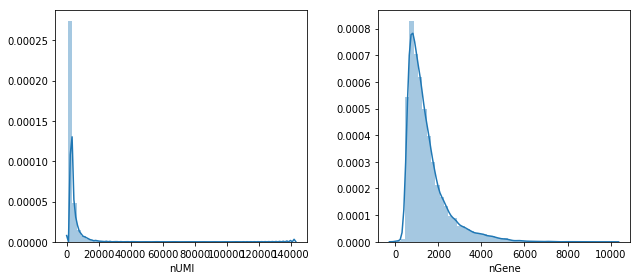

In [12]:
chen = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Chen/data.h5")
utils.peek(chen, "Chen")
chen = chen.normalize()
chen.obs.head()

In [13]:
chen_model = cb.directi.fit_DIRECTi(
    chen, chen.uns["seurat_genes"],
    **fixed_model_kwargs,
    path="/tmp/cb/db/Chen/model_0"
)
chen.latent = chen_model.inference(chen)

[DIRECTi epoch 0] train=1.965, val=1.954, time elapsed=1.5s Best save...
[DIRECTi epoch 1] train=1.772, val=1.005, time elapsed=1.0s Best save...
[DIRECTi epoch 2] train=0.721, val=0.648, time elapsed=1.0s Best save...
[DIRECTi epoch 3] train=0.622, val=0.631, time elapsed=1.0s Best save...
[DIRECTi epoch 4] train=0.601, val=0.604, time elapsed=1.0s Best save...
[DIRECTi epoch 5] train=0.587, val=0.590, time elapsed=0.9s Best save...
[DIRECTi epoch 6] train=0.581, val=0.591, time elapsed=0.9s
[DIRECTi epoch 7] train=0.570, val=0.566, time elapsed=1.0s Best save...
[DIRECTi epoch 8] train=0.550, val=0.545, time elapsed=0.9s Best save...
[DIRECTi epoch 9] train=0.535, val=0.534, time elapsed=1.0s Best save...
[DIRECTi epoch 10] train=0.528, val=0.528, time elapsed=1.0s Best save...
[DIRECTi epoch 11] train=0.523, val=0.522, time elapsed=1.0s Best save...
[DIRECTi epoch 12] train=0.519, val=0.518, time elapsed=0.9s Best save...
[DIRECTi epoch 13] train=0.515, val=0.513, time elapsed=1.0s 

[  Info   ] Computing tSNE...


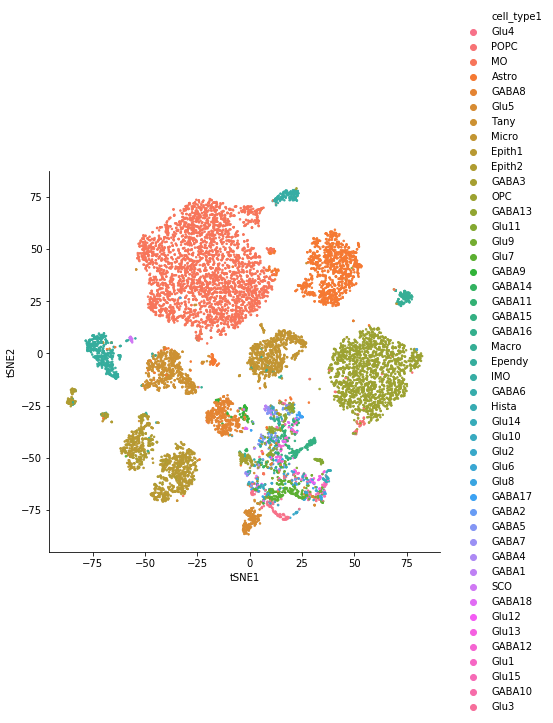

In [14]:
plot = chen.visualize_latent("cell_type1")
plot.get_figure().savefig("Chen/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


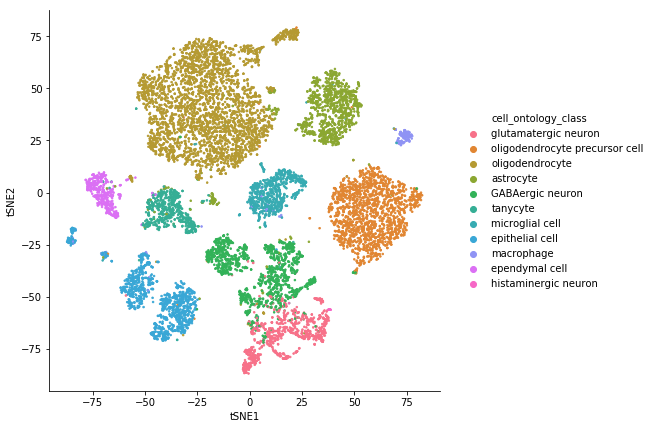

In [15]:
plot = chen.visualize_latent("cell_ontology_class")
plot.get_figure().savefig("Chen/cell_ontology_class.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


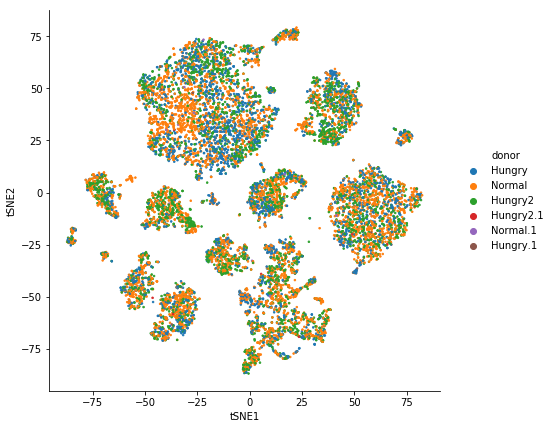

In [16]:
plot = chen.visualize_latent("donor")
plot.get_figure().savefig("Chen/donor.pdf", bbox_inches="tight")

In [17]:
%%capture capio
chen_models = [chen_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    chen_models.append(cb.directi.fit_DIRECTi(
        chen, chen.uns["seurat_genes"],
        **fixed_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Chen/model_%d" % i
    ))
chen_blast = cb.blast.BLAST(chen_models, chen, keep_exprs=True).build_empirical()
chen_blast.save("Chen")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Chen/model_1/checkpoint-128
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Chen/model_2/checkpoint-90
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Chen/model_3/checkpoint-100


In [18]:
with open("Chen/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Chen/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [19]:
utils.self_projection(chen_blast, "Chen")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.9513
Accuracy = 0.9863


### Lake_2018

/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


cell_ontology_class cell_ontology_id cell_type1  \
Gran_cbm1_TTAATCAGTCGC  cerebellar granule cell       CL:0001031       Gran   
Gran_cbm1_ACAACGACATCC  cerebellar granule cell       CL:0001031       Gran   
Gran_cbm1_TATGTCTATATG  cerebellar granule cell       CL:0001031       Gran   
Gran_cbm1_TAATGGAAAATA  cerebellar granule cell       CL:0001031       Gran   
Gran_cbm1_CTGGACTACAGC  cerebellar granule cell       CL:0001031       Gran   

                       dataset_name donor  organ      organism    platform  \
Gran_cbm1_TTAATCAGTCGC    Lake_2018     1  Brain  Homo sapiens  snDrop-seq   
Gran_cbm1_ACAACGACATCC    Lake_2018     1  Brain  Homo sapiens  snDrop-seq   
Gran_cbm1_TATGTCTATATG    Lake_2018     1  Brain  Homo sapiens  snDrop-seq   
Gran_cbm1_TAATGGAAAATA    Lake_2018     1  Brain  Homo sapiens  snDrop-seq   
Gran_cbm1_CTGGACTACAGC    Lake_2018     1  Brain  Homo sapiens  snDrop-seq   

                       region  
Gran_cbm1_TTAATCAGTCGC    cbm  
Gran_cbm1_ACAACGACATCC    cbm  
Gran_cbm1_TATGTCTATATG    cbm  
Gran_cbm1_TAATGGAAAATA    cbm  
Gran_cbm1_CTGGACTACAGC    cbm

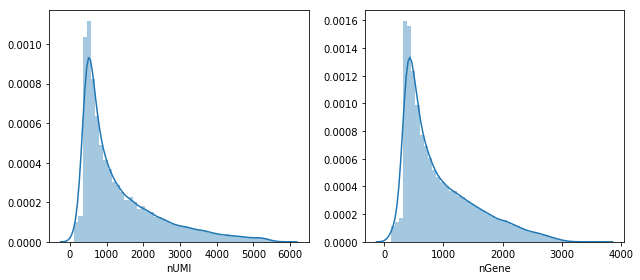

In [20]:
lake_2018 = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Lake_2018/data.h5")
utils.peek(lake_2018, "Lake_2018")
lake_2018 = lake_2018.normalize()
lake_2018.obs.head()

In [21]:
lake_2018_model = cb.directi.fit_DIRECTi(
    lake_2018, lake_2018.uns["seurat_genes"],
    **fixed_model_kwargs,
    path="/tmp/cb/db/Lake_2018/model_0"
) 
lake_2018.latent = lake_2018_model.inference(lake_2018)

[DIRECTi epoch 0] train=1.341, val=0.583, time elapsed=3.6s Best save...
[DIRECTi epoch 1] train=0.533, val=0.556, time elapsed=2.9s Best save...
[DIRECTi epoch 2] train=0.514, val=0.528, time elapsed=2.9s Best save...
[DIRECTi epoch 3] train=0.504, val=0.505, time elapsed=2.9s Best save...
[DIRECTi epoch 4] train=0.498, val=0.501, time elapsed=2.9s Best save...
[DIRECTi epoch 5] train=0.495, val=0.500, time elapsed=2.9s Best save...
[DIRECTi epoch 6] train=0.493, val=0.498, time elapsed=2.9s Best save...
[DIRECTi epoch 7] train=0.491, val=0.497, time elapsed=2.9s Best save...
[DIRECTi epoch 8] train=0.488, val=0.493, time elapsed=2.9s Best save...
[DIRECTi epoch 9] train=0.486, val=0.490, time elapsed=2.9s Best save...
[DIRECTi epoch 10] train=0.485, val=0.490, time elapsed=2.9s Best save...
[DIRECTi epoch 11] train=0.485, val=0.490, time elapsed=2.9s Best save...
[DIRECTi epoch 12] train=0.484, val=0.489, time elapsed=2.9s Best save...
[DIRECTi epoch 13] train=0.483, val=0.488, time 

[  Info   ] Computing tSNE...


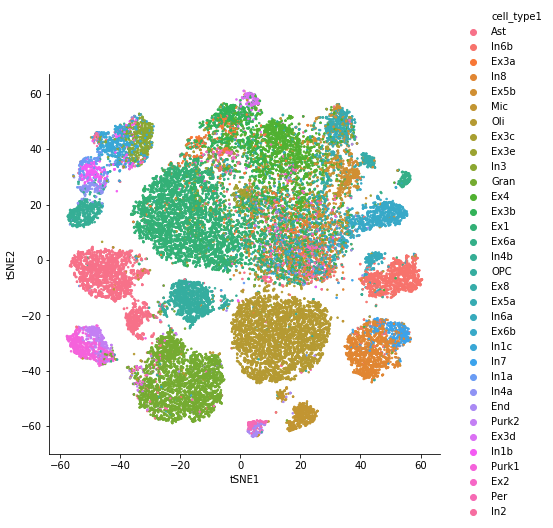

In [22]:
plot = lake_2018.visualize_latent("cell_type1")
plot.get_figure().savefig("Lake_2018/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


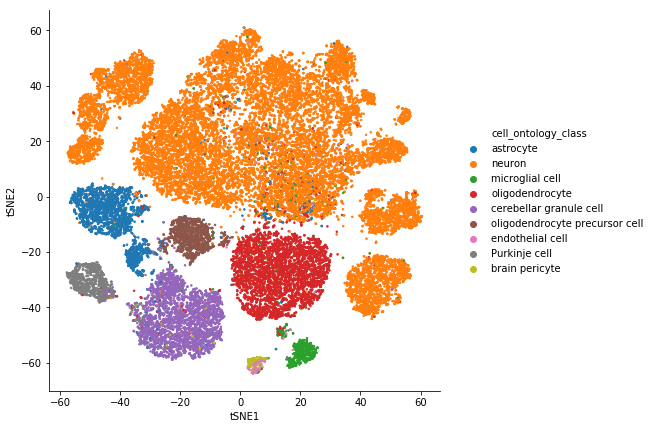

In [23]:
plot = lake_2018.visualize_latent("cell_ontology_class")
plot.get_figure().savefig("Lake_2018/cell_ontology_class.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


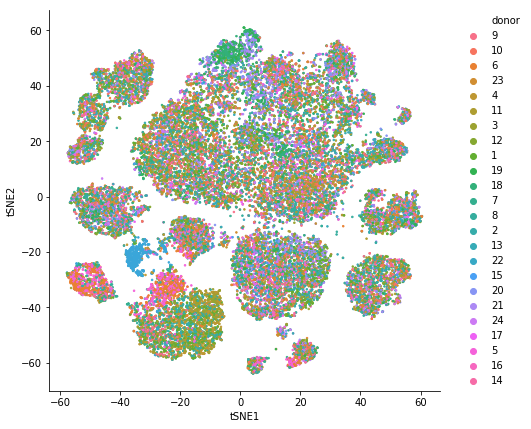

In [24]:
plot = lake_2018.visualize_latent("donor")
plot.get_figure().savefig("Lake_2018/donor.pdf", bbox_inches="tight")

In [25]:
%%capture capio
lake_2018_models = [lake_2018_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    lake_2018_models.append(cb.directi.fit_DIRECTi(
        lake_2018, lake_2018.uns["seurat_genes"],
        **fixed_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Lake_2018/model_%d" % i
    ))
lake_2018_blast = cb.blast.BLAST(lake_2018_models, lake_2018, keep_exprs=True).build_empirical()
lake_2018_blast.save("Lake_2018")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Lake_2018/model_1/checkpoint-52
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Lake_2018/model_2/checkpoint-64
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Lake_2018/model_3/checkpoint-66


In [26]:
with open("Lake_2018/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Lake_2018/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [27]:
utils.self_projection(lake_2018_blast, "Lake_2018")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...


/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:313: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)


Coverage = 0.9304
Accuracy = 0.9758


### Quake_Smart-seq2_Brain_Myeloid

/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


cell_ontology_class cell_ontology_id       cell_type1  \
O5.MAA000570.3_8_M.1.1      microglial cell       CL:0000129  microglial cell   
C3.MAA000570.3_8_M.1.1      microglial cell       CL:0000129  microglial cell   
F17.MAA000570.3_8_M.1.1     microglial cell       CL:0000129  microglial cell   
I17.MAA000570.3_8_M.1.1     microglial cell       CL:0000129  microglial cell   
K17.MAA000570.3_8_M.1.1     microglial cell       CL:0000129  microglial cell   

                           channel  cluster                    dataset_name  \
O5.MAA000570.3_8_M.1.1   MAA000570      0.0  Quake_Smart-seq2_Brain_Myeloid   
C3.MAA000570.3_8_M.1.1   MAA000570      3.0  Quake_Smart-seq2_Brain_Myeloid   
F17.MAA000570.3_8_M.1.1  MAA000570      3.0  Quake_Smart-seq2_Brain_Myeloid   
I17.MAA000570.3_8_M.1.1  MAA000570      3.0  Quake_Smart-seq2_Brain_Myeloid   
K17.MAA000570.3_8_M.1.1  MAA000570      3.0  Quake_Smart-seq2_Brain_Myeloid   

                         donor free_annotation gender          organ  \
O5.MAA000570.3_8_M.1.1   3_8_M                      M  Brain Myeloid   
C3.MAA000570.3_8_M.1.1   3_8_M                      M  Brain Myeloid   
F17.MAA000570.3_8_M.1.1  3_8_M                      M  Brain Myeloid   
I17.MAA000570.3_8_M.1.1  3_8_M                      M  Brain Myeloid   
K17.MAA000570.3_8_M.1.1  3_8_M                      M  Brain Myeloid   

                             organism    platform      region  
O5.MAA000570.3_8_M.1.1   Mus musculus  Smart-seq2  Cerebellum  
C3.MAA000570.3_8_M.1.1   Mus musculus  Smart-seq2  Cerebellum  
F17.MAA000570.3_8_M.1.1  Mus musculus  Smart-seq2  Cerebellum  
I17.MAA000570.3_8_M.1.1  Mus musculus  Smart-seq2  Cerebellum  
K17.MAA000570.3_8_M.1.1  Mus musculus  Smart-seq2  Cerebellum

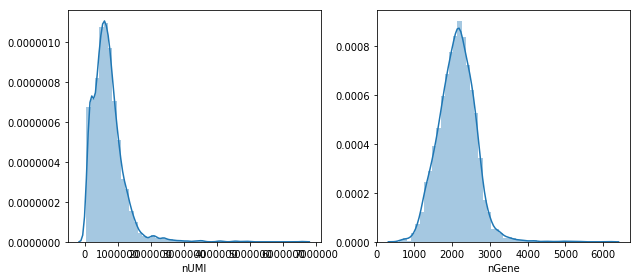

In [28]:
quake_smart_seq2_brain_myeloid = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Quake_Smart-seq2_Brain_Myeloid/data.h5")
utils.peek(quake_smart_seq2_brain_myeloid, "Quake_Smart-seq2_Brain_Myeloid")
quake_smart_seq2_brain_myeloid = quake_smart_seq2_brain_myeloid.normalize()
quake_smart_seq2_brain_myeloid.obs.head()

In [29]:
opt_model_kwargs = dict(batch_effect="donor")
quake_smart_seq2_brain_myeloid_model = cb.directi.fit_DIRECTi(
    quake_smart_seq2_brain_myeloid, quake_smart_seq2_brain_myeloid.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/Quake_Smart-seq2_Brain_Myeloid/model_0"
) 
quake_smart_seq2_brain_myeloid.latent = quake_smart_seq2_brain_myeloid_model.inference(quake_smart_seq2_brain_myeloid)

[DIRECTi epoch 0] train=3.077, val=3.103, time elapsed=1.2s Regular save...
[DIRECTi epoch 1] train=3.058, val=3.076, time elapsed=0.4s
[DIRECTi epoch 2] train=3.024, val=3.031, time elapsed=0.4s
[DIRECTi epoch 3] train=2.926, val=2.830, time elapsed=0.4s
[DIRECTi epoch 4] train=1.749, val=1.015, time elapsed=0.4s
[DIRECTi epoch 5] train=0.855, val=0.837, time elapsed=0.4s
[DIRECTi epoch 6] train=0.837, val=0.831, time elapsed=0.4s
[DIRECTi epoch 7] train=0.833, val=0.878, time elapsed=0.4s
[DIRECTi epoch 8] train=0.831, val=1.703, time elapsed=0.4s
[DIRECTi epoch 9] train=0.829, val=0.889, time elapsed=0.4s
[DIRECTi epoch 10] train=0.826, val=0.969, time elapsed=0.4s Regular save...
[DIRECTi epoch 11] train=0.824, val=0.862, time elapsed=0.4s
[DIRECTi epoch 12] train=0.821, val=0.896, time elapsed=0.4s
[DIRECTi epoch 13] train=0.820, val=0.849, time elapsed=0.4s
[DIRECTi epoch 14] train=0.817, val=1.841, time elapsed=0.4s
[DIRECTi epoch 15] train=0.814, val=2.386, time elapsed=0.4s
[D

[  Info   ] Computing tSNE...


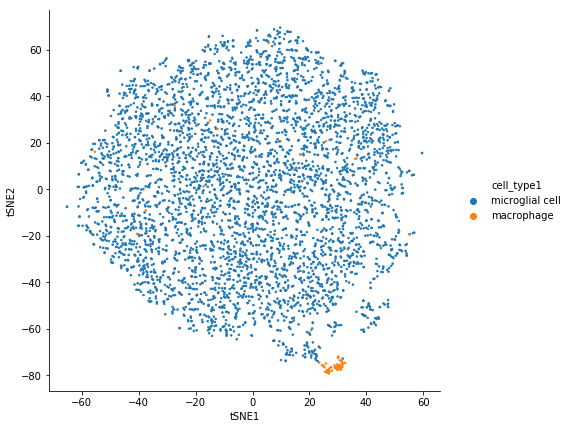

In [30]:
plot = quake_smart_seq2_brain_myeloid.visualize_latent("cell_type1")
plot.get_figure().savefig("Quake_Smart-seq2_Brain_Myeloid/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


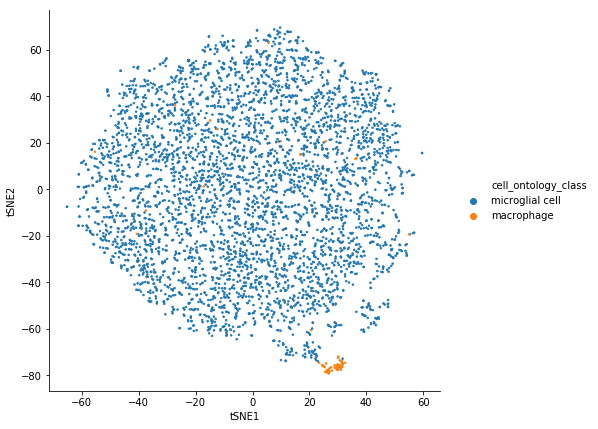

In [31]:
plot = quake_smart_seq2_brain_myeloid.visualize_latent("cell_ontology_class")
plot.get_figure().savefig("Quake_Smart-seq2_Brain_Myeloid/cell_ontology_class.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


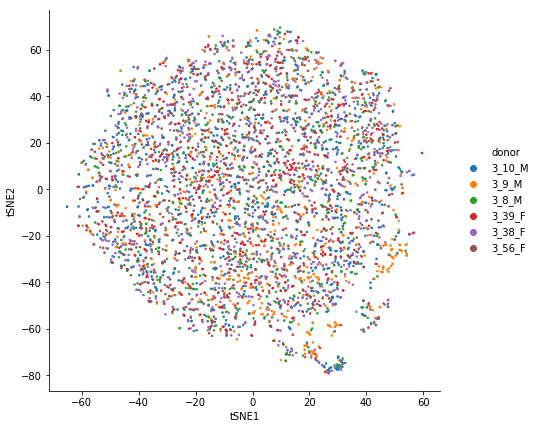

In [32]:
plot = quake_smart_seq2_brain_myeloid.visualize_latent("donor")
plot.get_figure().savefig("Quake_Smart-seq2_Brain_Myeloid/donor.pdf", bbox_inches="tight")

In [33]:
%%capture capio
quake_smart_seq2_brain_myeloid_models = [quake_smart_seq2_brain_myeloid_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    quake_smart_seq2_brain_myeloid_models.append(cb.directi.fit_DIRECTi(
        quake_smart_seq2_brain_myeloid, quake_smart_seq2_brain_myeloid.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Quake_Smart-seq2_Brain_Myeloid/model_%d" % i
    ))
quake_smart_seq2_brain_myeloid_blast = cb.blast.BLAST(quake_smart_seq2_brain_myeloid_models, quake_smart_seq2_brain_myeloid, keep_exprs=True).build_empirical()
quake_smart_seq2_brain_myeloid_blast.save("Quake_Smart-seq2_Brain_Myeloid")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_Smart-seq2_Brain_Myeloid/model_1/checkpoint-72
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_Smart-seq2_Brain_Myeloid/model_2/checkpoint-83
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_Smart-seq2_Brain_Myeloid/model_3/checkpoint-74


In [34]:
with open("Quake_Smart-seq2_Brain_Myeloid/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Quake_Smart-seq2_Brain_Myeloid/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [35]:
utils.self_projection(quake_smart_seq2_brain_myeloid_blast, "Quake_Smart-seq2_Brain_Myeloid")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.8642
Accuracy = 0.9971


### Quake_Smart-seq2_Brain_Non-Myeloid

/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


cell_ontology_class cell_ontology_id  \
E19.MAA000538.3_8_M.1.1  Bergmann glial cell       CL:0000644   
F11.MAA000538.3_8_M.1.1      oligodendrocyte       CL:0000128   
H11.MAA000538.3_8_M.1.1               neuron       CL:0000540   
J7.MAA000538.3_8_M.1.1       oligodendrocyte       CL:0000128   
K1.MAA000538.3_8_M.1.1       oligodendrocyte       CL:0000128   

                                  cell_type1    channel  cluster  \
E19.MAA000538.3_8_M.1.1  Bergmann glial cell  MAA000538      2.0   
F11.MAA000538.3_8_M.1.1      oligodendrocyte  MAA000538      3.0   
H11.MAA000538.3_8_M.1.1               neuron  MAA000538      6.0   
J7.MAA000538.3_8_M.1.1       oligodendrocyte  MAA000538      7.0   
K1.MAA000538.3_8_M.1.1       oligodendrocyte  MAA000538      0.0   

                                               dataset_name  donor  \
E19.MAA000538.3_8_M.1.1  Quake_Smart-seq2_Brain_Non-Myeloid  3_8_M   
F11.MAA000538.3_8_M.1.1  Quake_Smart-seq2_Brain_Non-Myeloid  3_8_M   
H11.MAA000538.3_8_M.1.1  Quake_Smart-seq2_Brain_Non-Myeloid  3_8_M   
J7.MAA000538.3_8_M.1.1   Quake_Smart-seq2_Brain_Non-Myeloid  3_8_M   
K1.MAA000538.3_8_M.1.1   Quake_Smart-seq2_Brain_Non-Myeloid  3_8_M   

                                                          free_annotation  \
E19.MAA000538.3_8_M.1.1                                                     
F11.MAA000538.3_8_M.1.1                                                     
H11.MAA000538.3_8_M.1.1  excitatory neurons and some neuronal stemm cells   
J7.MAA000538.3_8_M.1.1                                                      
K1.MAA000538.3_8_M.1.1                                                      

                        gender              organ      organism    platform  \
E19.MAA000538.3_8_M.1.1      M  Brain Non-Myeloid  Mus musculus  Smart-seq2   
F11.MAA000538.3_8_M.1.1      M  Brain Non-Myeloid  Mus musculus  Smart-seq2   
H11.MAA000538.3_8_M.1.1      M  Brain Non-Myeloid  Mus musculus  Smart-seq2   
J7.MAA000538.3_8_M.1.1       M  Brain Non-Myeloid  Mus musculus  Smart-seq2   
K1.MAA000538.3_8_M.1.1       M  Brain Non-Myeloid  Mus musculus  Smart-seq2   

                             region  
E19.MAA000538.3_8_M.1.1  Cerebellum  
F11.MAA000538.3_8_M.1.1  Cerebellum  
H11.MAA000538.3_8_M.1.1  Cerebellum  
J7.MAA000538.3_8_M.1.1   Cerebellum  
K1.MAA000538.3_8_M.1.1   Cerebellum

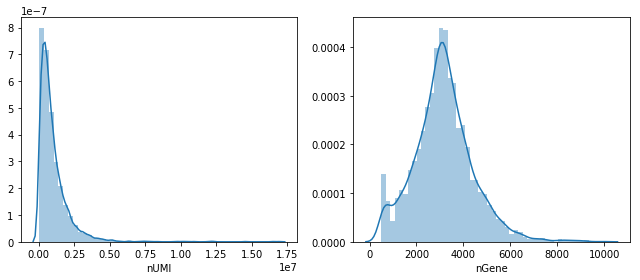

In [36]:
quake_smart_seq2_brain_non_myeloid = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Quake_Smart-seq2_Brain_Non-Myeloid/data.h5")
utils.peek(quake_smart_seq2_brain_non_myeloid, "Quake_Smart-seq2_Brain_Non-Myeloid")
quake_smart_seq2_brain_non_myeloid = quake_smart_seq2_brain_non_myeloid.normalize()
quake_smart_seq2_brain_non_myeloid.obs.head()

In [37]:
quake_smart_seq2_brain_non_myeloid_model = cb.directi.fit_DIRECTi(
    quake_smart_seq2_brain_non_myeloid, quake_smart_seq2_brain_non_myeloid.uns["seurat_genes"],
    **fixed_model_kwargs,
    path="/tmp/cb/db/Quake_Smart-seq2_Brain_Non-Myeloid/model_0"
) 
quake_smart_seq2_brain_non_myeloid.latent = quake_smart_seq2_brain_non_myeloid_model.inference(quake_smart_seq2_brain_non_myeloid)

[DIRECTi epoch 0] train=3.222, val=3.329, time elapsed=1.0s Best save...
[DIRECTi epoch 1] train=3.207, val=3.311, time elapsed=0.2s Best save...
[DIRECTi epoch 2] train=3.188, val=3.288, time elapsed=0.2s Best save...
[DIRECTi epoch 3] train=3.159, val=3.253, time elapsed=0.2s Best save...
[DIRECTi epoch 4] train=3.106, val=3.165, time elapsed=0.2s Best save...
[DIRECTi epoch 5] train=2.566, val=2.062, time elapsed=0.2s Best save...
[DIRECTi epoch 6] train=1.207, val=1.475, time elapsed=0.2s Best save...
[DIRECTi epoch 7] train=1.047, val=1.280, time elapsed=0.2s Best save...
[DIRECTi epoch 8] train=1.039, val=1.203, time elapsed=0.2s Best save...
[DIRECTi epoch 9] train=1.032, val=1.239, time elapsed=0.2s
[DIRECTi epoch 10] train=1.036, val=1.141, time elapsed=0.2s Best save...
[DIRECTi epoch 11] train=1.033, val=1.099, time elapsed=0.2s Best save...
[DIRECTi epoch 12] train=1.019, val=1.058, time elapsed=0.2s Best save...
[DIRECTi epoch 13] train=0.969, val=1.053, time elapsed=0.2s 

[  Info   ] Computing tSNE...


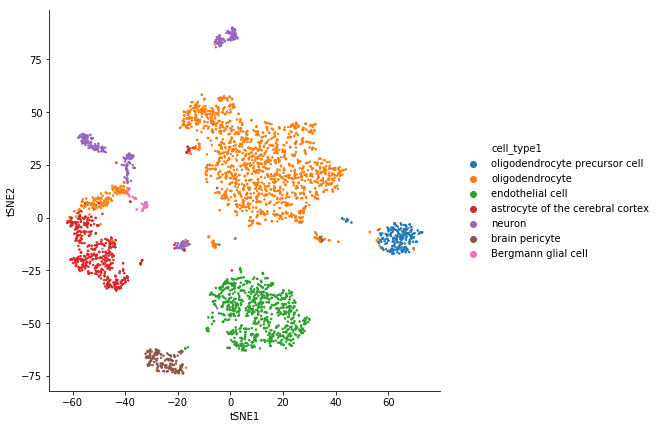

In [38]:
plot = quake_smart_seq2_brain_non_myeloid.visualize_latent("cell_type1")
plot.get_figure().savefig("Quake_Smart-seq2_Brain_Non-Myeloid/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


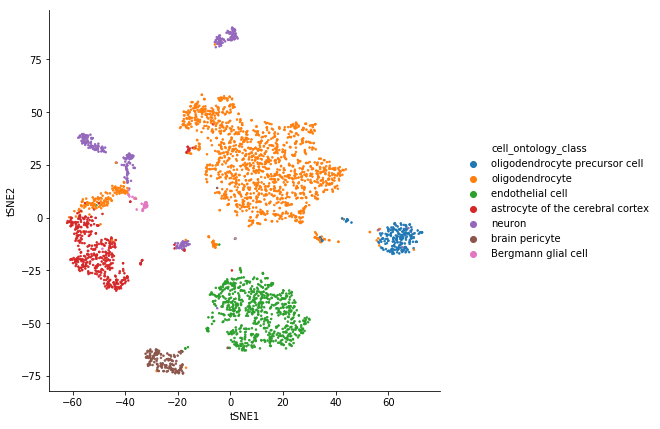

In [39]:
plot = quake_smart_seq2_brain_non_myeloid.visualize_latent("cell_ontology_class")
plot.get_figure().savefig("Quake_Smart-seq2_Brain_Non-Myeloid/cell_ontology_class.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


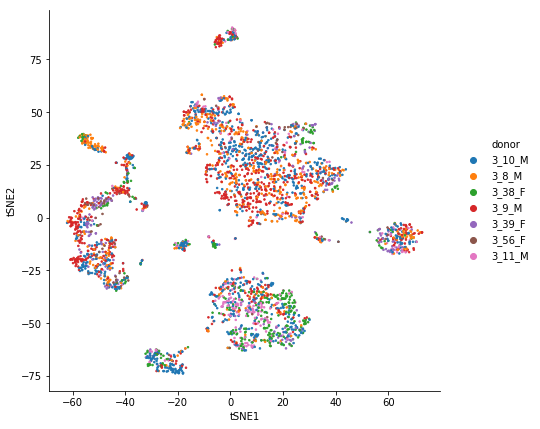

In [40]:
plot = quake_smart_seq2_brain_non_myeloid.visualize_latent("donor")
plot.get_figure().savefig("Quake_Smart-seq2_Brain_Non-Myeloid/donor.pdf", bbox_inches="tight")

In [41]:
%%capture capio
quake_smart_seq2_brain_non_myeloid_models = [quake_smart_seq2_brain_non_myeloid_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    quake_smart_seq2_brain_non_myeloid_models.append(cb.directi.fit_DIRECTi(
        quake_smart_seq2_brain_non_myeloid, quake_smart_seq2_brain_non_myeloid.uns["seurat_genes"],
        **fixed_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Quake_Smart-seq2_Brain_Non-Myeloid/model_%d" % i
    ))
quake_smart_seq2_brain_non_myeloid_blast = cb.blast.BLAST(quake_smart_seq2_brain_non_myeloid_models, quake_smart_seq2_brain_non_myeloid, keep_exprs=True).build_empirical()
quake_smart_seq2_brain_non_myeloid_blast.save("Quake_Smart-seq2_Brain_Non-Myeloid")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_Smart-seq2_Brain_Non-Myeloid/model_1/checkpoint-241
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_Smart-seq2_Brain_Non-Myeloid/model_2/checkpoint-213
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Quake_Smart-seq2_Brain_Non-Myeloid/model_3/checkpoint-258


In [42]:
with open("Quake_Smart-seq2_Brain_Non-Myeloid/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Quake_Smart-seq2_Brain_Non-Myeloid/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [43]:
utils.self_projection(quake_smart_seq2_brain_non_myeloid_blast, "Quake_Smart-seq2_Brain_Non-Myeloid")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.9324
Accuracy = 0.9912


---

# Lizard

### Tosches_lizard

/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


cell_ontology_class cell_ontology_id  \
d3s12_AAACCATCCCTC  oligodendrocyte precursor cell       CL:0002453   
d3s12_AACACCTCTGGA  oligodendrocyte precursor cell       CL:0002453   
d3s12_ACAGAGGTTCCN  oligodendrocyte precursor cell       CL:0002453   
d3s12_AGAGAGTAGAAG  oligodendrocyte precursor cell       CL:0002453   
d3s12_AGGTCCAGTAAG  oligodendrocyte precursor cell       CL:0002453   

                   cell_type1    dataset_name     donor gender  organ  \
d3s12_AAACCATCCCTC        OPC  Tosches_lizard  donor_09   male  Brain   
d3s12_AACACCTCTGGA        OPC  Tosches_lizard  donor_09   male  Brain   
d3s12_ACAGAGGTTCCN        OPC  Tosches_lizard  donor_09   male  Brain   
d3s12_AGAGAGTAGAAG        OPC  Tosches_lizard  donor_09   male  Brain   
d3s12_AGGTCCAGTAAG        OPC  Tosches_lizard  donor_09   male  Brain   

                            organism  platform  region  
d3s12_AAACCATCCCTC  Pogona vitticeps  Drop-seq  cortex  
d3s12_AACACCTCTGGA  Pogona vitticeps  Drop-seq  cortex  
d3s12_ACAGAGGTTCCN  Pogona vitticeps  Drop-seq  cortex  
d3s12_AGAGAGTAGAAG  Pogona vitticeps  Drop-seq  cortex  
d3s12_AGGTCCAGTAAG  Pogona vitticeps  Drop-seq  cortex

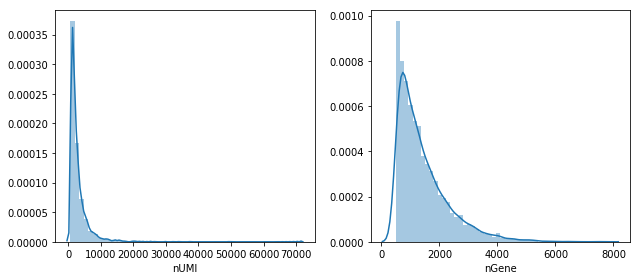

In [44]:
tosches_lizard = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Tosches_lizard/data.h5")
tosches_lizard.obs["donor"] = "donor_" + tosches_lizard.obs["donor"]
utils.peek(tosches_lizard, "Tosches_lizard")
tosches_lizard = tosches_lizard.normalize()
tosches_lizard.obs.head()

In [45]:
opt_model_kwargs = dict(batch_effect="donor")
tosches_lizard_model = cb.directi.fit_DIRECTi(
    tosches_lizard, tosches_lizard.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/Tosches_lizard/model_0"
) 
tosches_lizard.latent = tosches_lizard_model.inference(tosches_lizard)

[DIRECTi epoch 0] train=1.779, val=1.824, time elapsed=1.3s Regular save...
[DIRECTi epoch 1] train=1.779, val=1.822, time elapsed=0.4s
[DIRECTi epoch 2] train=1.777, val=1.814, time elapsed=0.4s
[DIRECTi epoch 3] train=1.762, val=1.796, time elapsed=0.4s
[DIRECTi epoch 4] train=1.737, val=1.752, time elapsed=0.4s
[DIRECTi epoch 5] train=1.304, val=0.980, time elapsed=0.4s
[DIRECTi epoch 6] train=0.733, val=1.013, time elapsed=0.4s
[DIRECTi epoch 7] train=0.710, val=0.883, time elapsed=0.4s
[DIRECTi epoch 8] train=0.705, val=0.816, time elapsed=0.4s
[DIRECTi epoch 9] train=0.703, val=0.782, time elapsed=0.4s
[DIRECTi epoch 10] train=0.701, val=0.760, time elapsed=0.4s Regular save...
[DIRECTi epoch 11] train=0.695, val=0.726, time elapsed=0.4s
[DIRECTi epoch 12] train=0.680, val=0.715, time elapsed=0.4s
[DIRECTi epoch 13] train=0.672, val=0.718, time elapsed=0.4s
[DIRECTi epoch 14] train=0.665, val=0.700, time elapsed=0.4s
[DIRECTi epoch 15] train=0.662, val=0.699, time elapsed=0.4s
[D

[  Info   ] Computing tSNE...


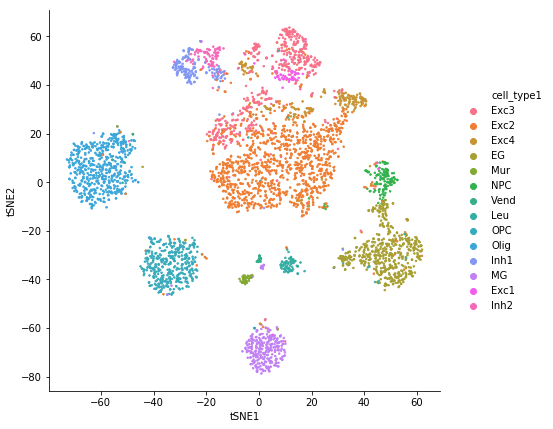

In [46]:
plot = tosches_lizard.visualize_latent("cell_type1")
plot.get_figure().savefig("Tosches_lizard/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


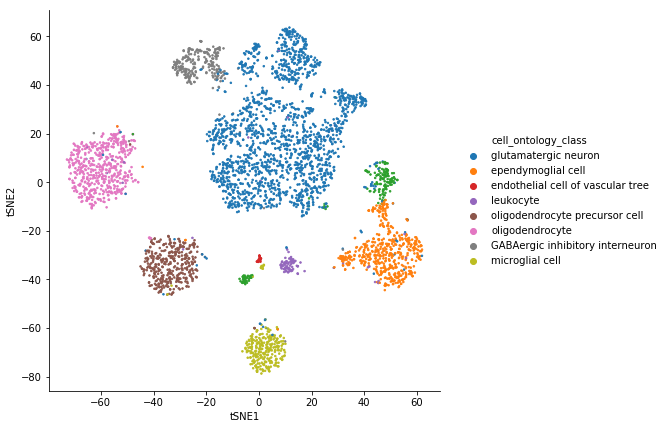

In [47]:
plot = tosches_lizard.visualize_latent("cell_ontology_class")
plot.get_figure().savefig("Tosches_lizard/cell_ontology_class.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


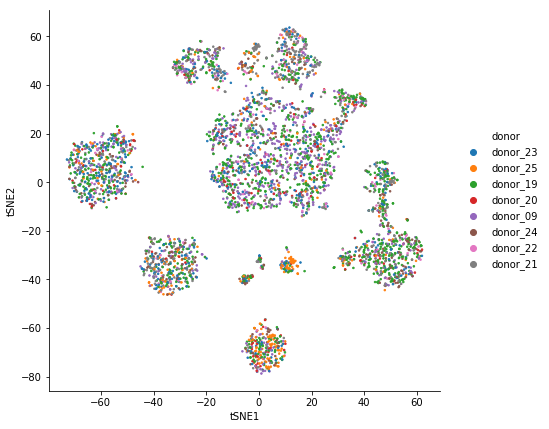

In [48]:
plot = tosches_lizard.visualize_latent("donor")
plot.get_figure().savefig("Tosches_lizard/donor.pdf", bbox_inches="tight")

In [49]:
%%capture capio
tosches_lizard_models = [tosches_lizard_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    tosches_lizard_models.append(cb.directi.fit_DIRECTi(
        tosches_lizard, tosches_lizard.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Tosches_lizard/model_%d" % i
    ))
tosches_lizard_blast = cb.blast.BLAST(tosches_lizard_models, tosches_lizard, keep_exprs=True).build_empirical()
tosches_lizard_blast.save("Tosches_lizard")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Tosches_lizard/model_1/checkpoint-134
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Tosches_lizard/model_2/checkpoint-124
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Tosches_lizard/model_3/checkpoint-117


In [50]:
with open("Tosches_lizard/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Tosches_lizard/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [51]:
utils.self_projection(tosches_lizard_blast, "Tosches_lizard")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...
Coverage = 0.8803
Accuracy = 0.9818


---

# Turtle

### Tosches_turtle

/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


cell_ontology_class cell_ontology_id cell_type1  \
d3s01_TTTACACTATTA  glutamatergic neuron       CL:0000679       Exc1   
d3s01_ATCATCGGACGA  glutamatergic neuron       CL:0000679       Exc4   
d3s01_ATCCTAGTTCCC  glutamatergic neuron       CL:0000679       Exc1   
d3s01_GACCTTCCGACG  glutamatergic neuron       CL:0000679       Exc3   
d3s01_TCATATTGTTAT  glutamatergic neuron       CL:0000679       Exc1   

                      dataset_name    donor  gender  organ  \
d3s01_TTTACACTATTA  Tosches_turtle  donor_8  female  Brain   
d3s01_ATCATCGGACGA  Tosches_turtle  donor_8  female  Brain   
d3s01_ATCCTAGTTCCC  Tosches_turtle  donor_8  female  Brain   
d3s01_GACCTTCCGACG  Tosches_turtle  donor_8  female  Brain   
d3s01_TCATATTGTTAT  Tosches_turtle  donor_8  female  Brain   

                                     organism  platform  region sample  
d3s01_TTTACACTATTA  Trachemys scripta elegans  Drop-seq  cortex    8.1  
d3s01_ATCATCGGACGA  Trachemys scripta elegans  Drop-seq  cortex    8.1  
d3s01_ATCCTAGTTCCC  Trachemys scripta elegans  Drop-seq  cortex    8.1  
d3s01_GACCTTCCGACG  Trachemys scripta elegans  Drop-seq  cortex    8.1  
d3s01_TCATATTGTTAT  Trachemys scripta elegans  Drop-seq  cortex    8.1

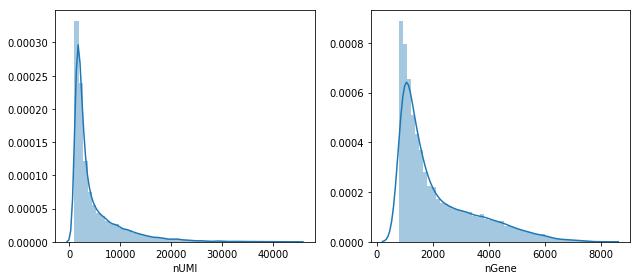

In [52]:
tosches_turtle = cb.data.ExprDataSet.read_dataset("../../Datasets/data/Tosches_turtle/data.h5")
tosches_turtle.obs["donor"] = "donor_" + tosches_turtle.obs["donor"]
utils.peek(tosches_turtle, "Tosches_turtle")
tosches_turtle = tosches_turtle.normalize()
tosches_turtle.obs.head()

In [53]:
opt_model_kwargs = dict(batch_effect="donor")
tosches_turtle_model = cb.directi.fit_DIRECTi(
    tosches_turtle, tosches_turtle.uns["seurat_genes"],
    **fixed_model_kwargs, **opt_model_kwargs,
    path="/tmp/cb/db/Tosches_turtle/model_0"
)
tosches_turtle.latent = tosches_turtle_model.inference(tosches_turtle)

[DIRECTi epoch 0] train=1.920, val=1.872, time elapsed=2.6s Regular save...
[DIRECTi epoch 1] train=1.059, val=0.939, time elapsed=1.7s
[DIRECTi epoch 2] train=0.802, val=0.764, time elapsed=1.8s
[DIRECTi epoch 3] train=0.755, val=0.749, time elapsed=1.8s
[DIRECTi epoch 4] train=0.746, val=0.755, time elapsed=1.7s
[DIRECTi epoch 5] train=0.741, val=0.747, time elapsed=1.8s
[DIRECTi epoch 6] train=0.733, val=0.729, time elapsed=1.8s
[DIRECTi epoch 7] train=0.725, val=0.721, time elapsed=1.7s
[DIRECTi epoch 8] train=0.720, val=0.720, time elapsed=1.8s
[DIRECTi epoch 9] train=0.716, val=0.711, time elapsed=1.7s
[DIRECTi epoch 10] train=0.712, val=0.707, time elapsed=1.8s Regular save...
[DIRECTi epoch 11] train=0.709, val=0.706, time elapsed=1.7s
[DIRECTi epoch 12] train=0.706, val=0.702, time elapsed=1.8s
[DIRECTi epoch 13] train=0.704, val=0.699, time elapsed=1.8s
[DIRECTi epoch 14] train=0.703, val=0.702, time elapsed=1.8s
[DIRECTi epoch 15] train=0.701, val=0.695, time elapsed=1.8s
[D

[  Info   ] Computing tSNE...


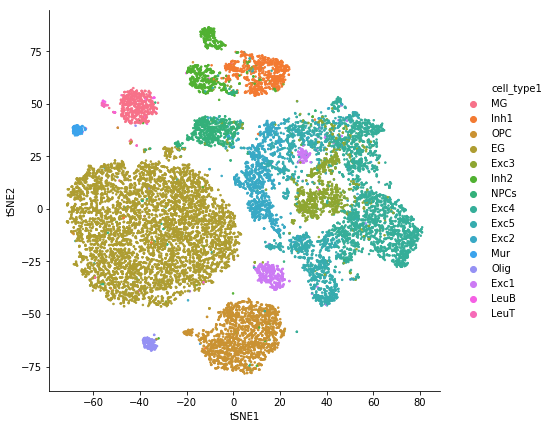

In [54]:
plot = tosches_turtle.visualize_latent("cell_type1")
plot.get_figure().savefig("Tosches_turtle/cell_type1.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


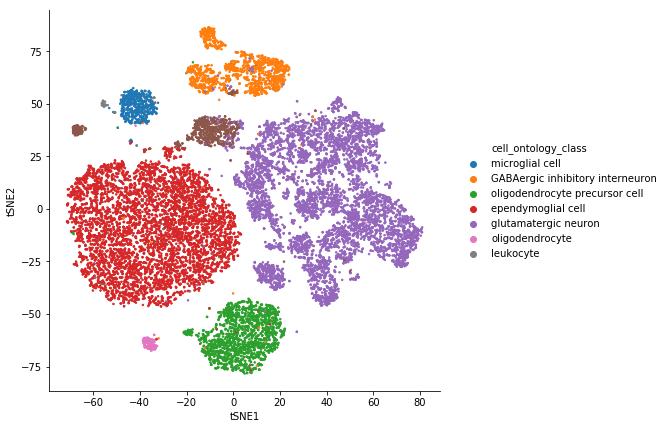

In [55]:
plot = tosches_turtle.visualize_latent("cell_ontology_class")
plot.get_figure().savefig("Tosches_turtle/cell_ontology_class.pdf", bbox_inches="tight")

[  Info   ] Using cached tSNE...


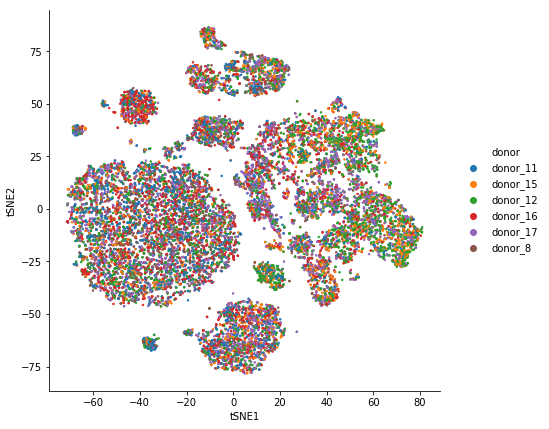

In [56]:
plot = tosches_turtle.visualize_latent("donor")
plot.get_figure().savefig("Tosches_turtle/donor.pdf", bbox_inches="tight")

In [57]:
%%capture capio
tosches_turtle_models = [tosches_turtle_model]
for i in range(1, cb.config.N_JOBS):
    print("==== Model %d ====" % i)
    tosches_turtle_models.append(cb.directi.fit_DIRECTi(
        tosches_turtle, tosches_turtle.uns["seurat_genes"],
        **fixed_model_kwargs, **opt_model_kwargs,
        random_seed=i, path="/tmp/cb/db/Tosches_turtle/model_%d" % i
    ))
tosches_turtle_blast = cb.blast.BLAST(tosches_turtle_models, tosches_turtle, keep_exprs=True).build_empirical()
tosches_turtle_blast.save("Tosches_turtle")

INFO:tensorflow:Restoring parameters from /tmp/cb/db/Tosches_turtle/model_1/checkpoint-99
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Tosches_turtle/model_2/checkpoint-88
INFO:tensorflow:Restoring parameters from /tmp/cb/db/Tosches_turtle/model_3/checkpoint-83


In [58]:
with open("Tosches_turtle/stdout.txt", "w") as f:
    f.write(capio.stdout)
with open("Tosches_turtle/stderr.txt", "w") as f:
    f.write(capio.stderr)

In [59]:
utils.self_projection(tosches_turtle_blast, "Tosches_turtle")

[  Info   ] Projecting to latent space...
[  Info   ] Doing nearest neighbor search...
[  Info   ] Merging hits across models...
[  Info   ] Computing posterior distribution distances...
[  Info   ] Computing empirical p-values...


/home/caozj/Software/anaconda2/envs/cb-gpu/lib/python3.6/site-packages/scipy/stats/stats.py:313: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)


Coverage = 0.9732
Accuracy = 0.9906
